In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.legend_handler import HandlerLine2D
import seaborn
import os
#%matplotlib inline

In [2]:
# Retrieve current working directory (`cwd`)
cwd = os.getcwd()
print(cwd)

path=os.getcwd()

# Change directory 
#os.chdir("/path/to/your/folder")



C:\Users\Aurora Firebirdaur\Desktop


In [3]:
#cdata_csv = os.path.join('Desktop', 'city_data.csv')
#rdata_csv = os.path.join('Desktop', 'ride_data.csv')
cdata_csv = os.path.join('./city_data.csv')
rdata_csv = os.path.join('./ride_data.csv')


In [4]:
# Read file with Pandas, and store its contents in a new variable
cdata_csv_df = pd.read_csv(cdata_csv)
rdata_csv_df = pd.read_csv(rdata_csv)
#print(cdata_csv_df)
#print(rdata_csv_df)
print(cdata_csv_df.head())
print(rdata_csv_df.head())

             city  driver_count   type
0      Kelseyland            63  Urban
1      Nguyenbury             8  Urban
2    East Douglas            12  Urban
3   West Dawnfurt            34  Urban
4  Rodriguezburgh            52  Urban
          city                 date   fare        ride_id
0     Sarabury  2016-01-16 13:49:27  38.35  5403689035038
1    South Roy  2016-01-02 18:42:34  17.49  4036272335942
2  Wiseborough  2016-01-21 17:35:29  44.18  3645042422587
3  Spencertown  2016-07-31 14:53:22   6.87  2242596575892
4   Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673


In [5]:
# Merge the two data frames on city 

merged_city_and_rides_df = pd.merge(left=cdata_csv_df, right=rdata_csv_df, how='left', on=["city","city"])
#print(merged_city_and_rides_df)

In [6]:
merged_city_and_rides_df.columns

Index(['city', 'driver_count', 'type', 'date', 'fare', 'ride_id'], dtype='object')

In [7]:
scat_df=(merged_city_and_rides_df.groupby(['type','city', 'driver_count']).agg({'fare':'mean', 'ride_id':'count'}))
scat_df = scat_df.reset_index()
print(scat_df)


         type                  city  driver_count       fare  ride_id
0       Rural           East Leslie             9  33.660909       11
1       Rural          East Stephen             6  39.053000       10
2       Rural         East Troybury             3  33.244286        7
3       Rural              Erikport             3  30.043750        8
4       Rural        Hernandezshire            10  32.002222        9
5       Rural             Horneland             8  21.482500        4
6       Rural           Jacksonfort             6  32.006667        6
7       Rural          Kennethburgh             3  36.928000       10
8       Rural             Kinghaven             3  34.980000        6
9       Rural         Manuelchester             7  49.620000        1
10      Rural           Matthewside             4  43.532500        4
11      Rural          New Johnbury             6  35.042500        4
12      Rural         North Whitney            10  38.146000       10
13      Rural       

In [8]:
suburban_df = scat_df[scat_df['type'] == 'Suburban']
rural_df = scat_df[scat_df['type'] == 'Rural']
urban_df = scat_df[scat_df['type'] == 'Urban']

#print(suburban_df)
#print(urban_df)

In [9]:
fig, ax = plt.subplots(1,1)
# set the figure boundaries

# Build a scatter plot for each City type

suburban_df.plot.scatter(x='ride_id',y='fare', s=suburban_df['driver_count']*10, color='lightskyblue',
                            label='Suburban',alpha=0.5, marker = 'o', ax=ax)
rural_df.plot.scatter(x='ride_id',y='fare', s=rural_df['driver_count']*10, color='gold',
                      label='Rural', alpha=0.5, marker = 'o',ax=ax)
urban_df.plot.scatter(x='ride_id',y='fare', s=urban_df['driver_count']*10, color='lightcoral', 
                      label='Urban', alpha=0.5, marker = 'o', ax=ax)

plt.style.use('seaborn-white')

plt.xlim([1, 40])
plt.ylim([1, 60])


(1, 60)

In [10]:
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number Rides Per City Type")
plt.ylabel("Average Fare by city type")
plt.grid(True)


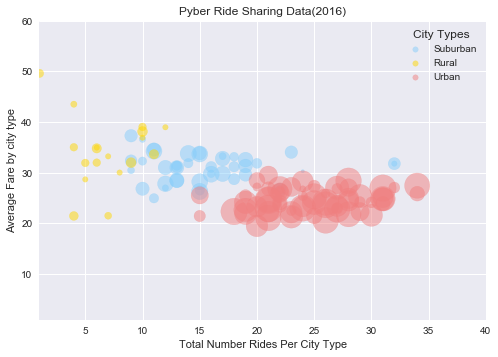

In [11]:
lgnd=plt.legend(scatterpoints=1, markerscale = 1.0,
           loc='upper right', ncol=1, 
           fontsize=10, title='City Types', labelspacing=0.5)

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.show()

# Save the figure
plt.savefig("City_RideShare.png")


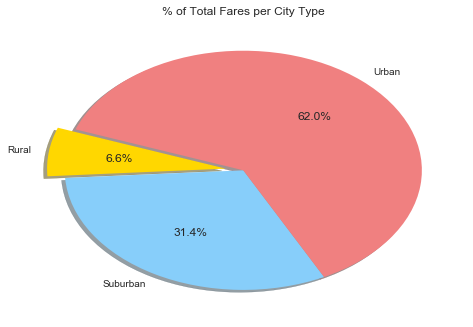

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

labels = ["Rural", "Suburban", "Urban"]
fares = (merged_city_and_rides_df.groupby('type').agg({'fare':'sum'}))

colors = ["gold", "lightskyblue", "lightcoral"]
# how big is the explosion, and what should explode?
explode = (0.1, 0, 0)

ax.set_title("% of Total Fares per City Type")
# the first two %'s format the number. The last one is what is displayed on the graph
ax.pie(fares, explode=explode, labels=labels,autopct="%1.1f%%",colors=colors, shadow=True, startangle=160)

plt.savefig("pie_fares.png")
plt.show()


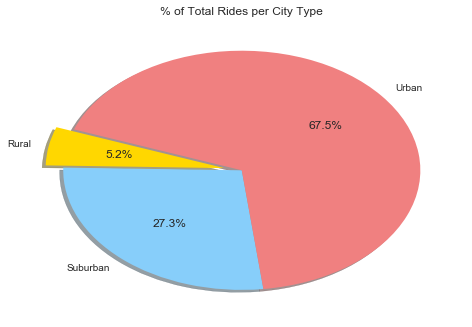

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

labels = ["Rural", "Suburban", "Urban"]
rides = (merged_city_and_rides_df.groupby('type').agg({'ride_id':'count'}))

colors = ["gold", "lightskyblue", "lightcoral"]
# how big is the explosion, and what should explode?
explode = (0.1, 0, 0)

ax.set_title("% of Total Rides per City Type")

# the first two %'s format the number. The last one is what is displayed on the graph
ax.pie(rides, explode=explode, labels=labels,autopct="%1.1f%%",colors=colors, shadow=True, startangle=160)

plt.savefig("pie_rides.png")
plt.show()


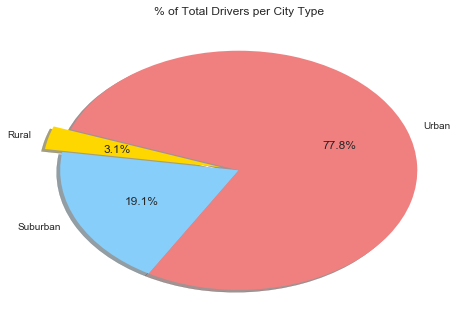

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

labels = ["Rural", "Suburban", "Urban"]
drivers = (cdata_csv_df.groupby("type").agg({"driver_count":"sum"}))

colors = ["gold", "lightskyblue", "lightcoral"]
# how big is the explosion, and what should explode?
explode = (0.1, 0, 0)

ax.set_title("% of Total Drivers per City Type")

# the first two %'s format the number. The last one is what is displayed on the graph
ax.pie(drivers, explode=explode, labels=labels,autopct="%1.1f%%",colors=colors, shadow=True, startangle=160)

plt.savefig("pie_drivers.png")
plt.show()
